## Tests com os compressores

In [3]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import cv2

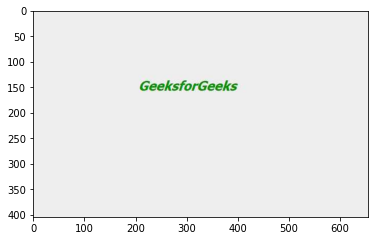

In [63]:
%matplotlib inline
pil_im = Image.open('frame2.jpg', 'r')
imshow(np.asarray(pil_im))

In [56]:
im = Image.open('frame.png')
im.save('frame2.jpg',"JPEG", quality=50)

In [57]:
import os

In [68]:
print(f"Data compression ratio: {os.stat('frame.png').st_size/os.stat('frame2.jpg').st_size}")
print(f"Space saving: {(1-(os.stat('frame2.jpg').st_size/os.stat('frame.png').st_size))*100}%")

Data compression ratio: 2.4759980604493292
Space saving: 59.612246230171685%


In [77]:
import cv2

In [78]:
cap= cv2.VideoCapture('hello_level.mp4')

# Para facilitar melhro usar o codec de mp4 (utiliza DCT!) e mecher no bitrate para comprimir o video

In [81]:
import moviepy.editor as moviepy

In [139]:
clip = moviepy.VideoFileClip("hello_level.mp4")
clip.write_videofile("hello_level2.mp4", bitrate = '50k', audio_bitrate = "40k")

Moviepy - Building video hello_level2.mp4.
MoviePy - Writing audio in hello_level2TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video hello_level2.mp4



Moviepy - Done !
Moviepy - video ready hello_level2.mp4


## Resultados

In [140]:
print(f"Data compression ratio: {os.stat('hello_level.mp4').st_size/os.stat('hello_level2.mp4').st_size}")
print(f"Space saving: {(1-(os.stat('hello_level2.mp4').st_size/os.stat('hello_level.mp4').st_size))*100}%")

Data compression ratio: 3.6800396734130634
Space saving: 72.82637991039518%


usando no subclip

In [85]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

In [87]:
ffmpeg_extract_subclip("Slicer-Combiner/2nd4.mp4", 0, 1, targetname='1.mp4')

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [136]:
clip = moviepy.VideoFileClip("1.mp4")
clip.write_videofile("12.mp4", codec = 'libx264', bitrate = '50k',  audio_bitrate = "43k")

Moviepy - Building video 12.mp4.
MoviePy - Writing audio in 12TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video 12.mp4



Moviepy - Done !
Moviepy - video ready 12.mp4


In [131]:
print(f"Data compression ratio: {os.stat('1.mp4').st_size/os.stat('12.mp4').st_size}")
print(f"Space saving: {(1-(os.stat('12.mp4').st_size/os.stat('1.mp4').st_size))*100}%")

Data compression ratio: 1.2540322580645162
Space saving: 20.2572347266881%


In [115]:
from IPython.display import Video

In [141]:
Video("hello_level2.mp4")

## Decidi usar uma biblioteca já pronta do Huffman para não ficar dando trabalho

In [143]:
!pip install dahuffman

In [144]:
from dahuffman import HuffmanCodec

In [146]:
import utils.string

In [156]:
a = utils.string.videoToString("Slicer-Combiner/2nd4.mp4")

In [157]:
codec = HuffmanCodec.from_data(a)

In [158]:
encoded = codec.encode(a)

In [159]:
len(encoded)

246070

In [160]:
len(a)

341352

In [161]:
b =codec.decode(encoded)

In [162]:
utils.string.stringToVideo(b, "dec")

# Funciona bem

In [163]:
Video("dec.mp4")